Lambda layer 와 Concatenate layer 를 사용하여 y = x + 2x^2 + 3x^3 + 1 관계를 피팅

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
h1_ABC (Lambda)                 [(None, 1), (None, 1 0           x[0][0]                          
__________________________________________________________________________________________________
concat (Concatenate)            (None, 3)            0           h1_ABC[0][0]                     
                                                                 h1_ABC[0][1]                     
                                                                 h1_ABC[0][2]                     
__________________________________________________________________________________________________
y (Dense) 

800/800 [==============================] - 0s 182us/step - loss: 1.9059 - val_loss: 1.7193
Epoch 64/200
800/800 [==============================] - 0s 181us/step - loss: 1.7482 - val_loss: 1.6027
Epoch 65/200
800/800 [==============================] - 0s 190us/step - loss: 1.6261 - val_loss: 1.5150
Epoch 66/200
800/800 [==============================] - 0s 191us/step - loss: 1.5311 - val_loss: 1.4444
Epoch 67/200
800/800 [==============================] - 0s 188us/step - loss: 1.4563 - val_loss: 1.3899
Epoch 68/200
800/800 [==============================] - 0s 183us/step - loss: 1.3989 - val_loss: 1.3469
Epoch 69/200
800/800 [==============================] - 0s 187us/step - loss: 1.3504 - val_loss: 1.3111
Epoch 70/200
800/800 [==============================] - 0s 181us/step - loss: 1.3116 - val_loss: 1.2793
Epoch 71/200
800/800 [==============================] - 0s 187us/step - loss: 1.2765 - val_loss: 1.2501
Epoch 72/200
800/800 [==============================] - 0s 186us/step - loss:

Epoch 141/200
800/800 [==============================] - 0s 187us/step - loss: 1.3376e-04 - val_loss: 1.0217e-04
Epoch 142/200
800/800 [==============================] - 0s 177us/step - loss: 8.5119e-05 - val_loss: 6.5989e-05
Epoch 143/200
800/800 [==============================] - 0s 192us/step - loss: 5.3068e-05 - val_loss: 3.9368e-05
Epoch 144/200
800/800 [==============================] - 0s 191us/step - loss: 3.2173e-05 - val_loss: 2.3723e-05
Epoch 145/200
800/800 [==============================] - 0s 185us/step - loss: 1.8984e-05 - val_loss: 1.3916e-05
Epoch 146/200
800/800 [==============================] - 0s 183us/step - loss: 1.0861e-05 - val_loss: 7.7689e-06
Epoch 147/200
800/800 [==============================] - 0s 178us/step - loss: 6.1669e-06 - val_loss: 4.2635e-06
Epoch 148/200
800/800 [==============================] - 0s 178us/step - loss: 3.2912e-06 - val_loss: 2.2761e-06
Epoch 149/200
800/800 [==============================] - 0s 182us/step - loss: 1.7406e-06 - val_

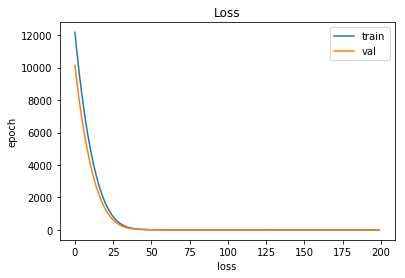

y_weights
[array([[1.000005 ],
       [1.9999974],
       [3.0000005]], dtype=float32), array([0.99999946], dtype=float32)]


In [1]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_train = np.random.rand(1000,1) * 10 - 5
y_train = 1 * x_train + 2 * x_train**2 + 3 * x_train**3 + 1

x = layers.Input(shape=(1,), name='x')
h1_A, h1_B, h1_C = layers.Lambda(lambda x: [x, x**2, x**3], name='h1_ABC')(x)
h2 = layers.Concatenate(name='concat')([h1_A, h1_B, h1_C])
y = layers.Dense(1, name='y')(h2)

model = models.Model(x, y)
model.summary()

model.compile('adam', 'mse')
hist = model.fit(x_train, y_train, batch_size=8, epochs=200,
                 validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

y_weights = model.get_layer('y').get_weights()
print('y_weights'); print(y_weights)